# Ordinary Least Squares

[Resource](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

## OLS estimation

Artificial data:

In [2]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

Our model needs an intercept to we add a column of 1s:

In [3]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

Fit and summary:

In [4]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.83e-239
Time:                        09:21:26   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

Quantities of interest can be extracted directly from the fitted model. Type `dir(results)` for a full list. Here are some examples:

In [5]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


## OLS non-linear curve but linear in parameters

We simulate artificial data with a non-linear relationship between x and y:

In [6]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

Fit and summary:

In [7]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           6.30e-27
Time:                        09:21:26   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

Extract other quantities of interest:

In [8]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the `wls_prediction_std` command.

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    4.770725  0.209449       4.349127       5.192324      3.675201   
1    5.222135  0.188855       4.841989       5.602280      4.141886   
2    5.636208  0.178247       5.277414       5.995001      4.563287   
3    5.986588  0.172575       5.639212       6.333964      4.917431   
4    6.256432  0.164839       5.924629       6.588235      5.192233   
5    6.441175  0.151171       6.136883       6.745467      5.385230   
6    6.549280  0.133149       6.281264       6.817296      5.503211   
7    6.600851  0.118015       6.363298       6.838403      5.562170   
8    6.624325  0.115035       6.392770       6.855879      5.586999   
9    6.651804  0.125484       6.399218       6.904390      5.609582   
10   6.713779  0.140171       6.431630       6.995929      5.664001   
11   6.834122  0.149115       6.533969       7.134275      5.779362   
12   7.026159  0.146900       6.730464       7.321854      5.972659   
13   7

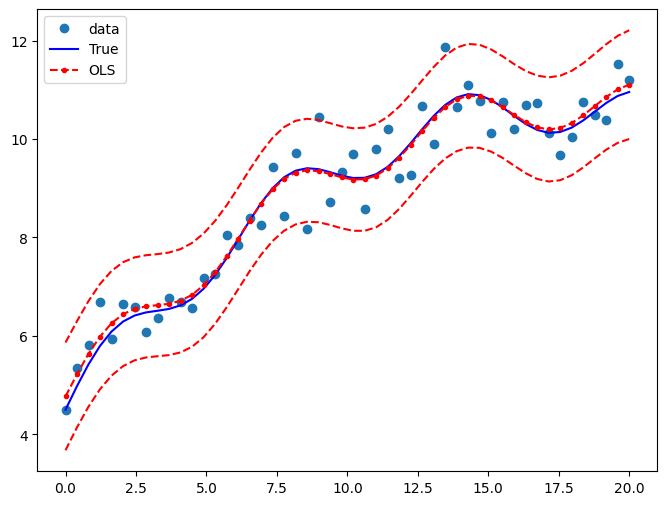

In [10]:
pred_ols = res.get_prediction()
iv_1 = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, 'o', label='data')
ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, res.fittedvalues, 'r--.', label='OLS')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_1, 'r--')
ax.legend(loc='best');
print(pred_ols.summary_frame())

In [ ]:
f